In [1]:
import pandas as pd

# Load the training data
train_data = pd.read_csv(r"C:\Users\subha\Downloads\train_data.txt\train_data.txt", sep=' ::: ', header=None, names=['index', 'title', 'genre', 'plot'], engine='python')

# Load the testing data
test_data = pd.read_csv(r"C:\Users\subha\Downloads\test_data.txt\test_data.txt", sep=' ::: ', header=None, names=['index', 'title', 'plot'], engine='python')

train_data.head()



,index,title,genre,plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [2]:
test_data.head()

,index,title,plot
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


In [3]:
import re

# Clean text function
def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    return text

# Apply the clean text function to the training dataset
train_data['clean_plot'] = train_data['plot'].apply(clean_text)

# Apply the clean text function to the test dataset 
test_data['clean_plot'] = test_data['plot'].apply(clean_text)

# Extract features and labels from the training data
X_train = train_data['clean_plot']
y_train = train_data['genre']

# Extract features from the test data 
X_test = test_data['clean_plot']


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)


In [5]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)


In [6]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)
lr_predictions = lr_model.predict(X_test_tfidf)


In [7]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)


In [8]:
# Create a DataFrame to store the results
test_data['nb_genre'] = nb_predictions
test_data['lr_genre'] = lr_predictions
test_data['svm_genre'] = svm_predictions

# Print the results
# print(
test_data[['title', 'plot', 'nb_genre', 'lr_genre', 'svm_genre']]


,title,plot,nb_genre,lr_genre,svm_genre
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart...",drama,drama,short
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi...",drama,drama,drama
2,Off the Beaten Track (2010),One year in the life of Albin and his family o...,documentary,documentary,documentary
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his...",drama,drama,drama
4,Er nu zhai (1955),Before he was known internationally as a marti...,drama,drama,drama
...,...,...,...,...,...
54195,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Dar...",drama,drama,drama
54196,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their ...,drama,action,comedy
54197,Oliver Twink (2007),"A movie 169 years in the making. Oliver Twist,...",comedy,comedy,comedy
54198,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard ...",drama,drama,drama


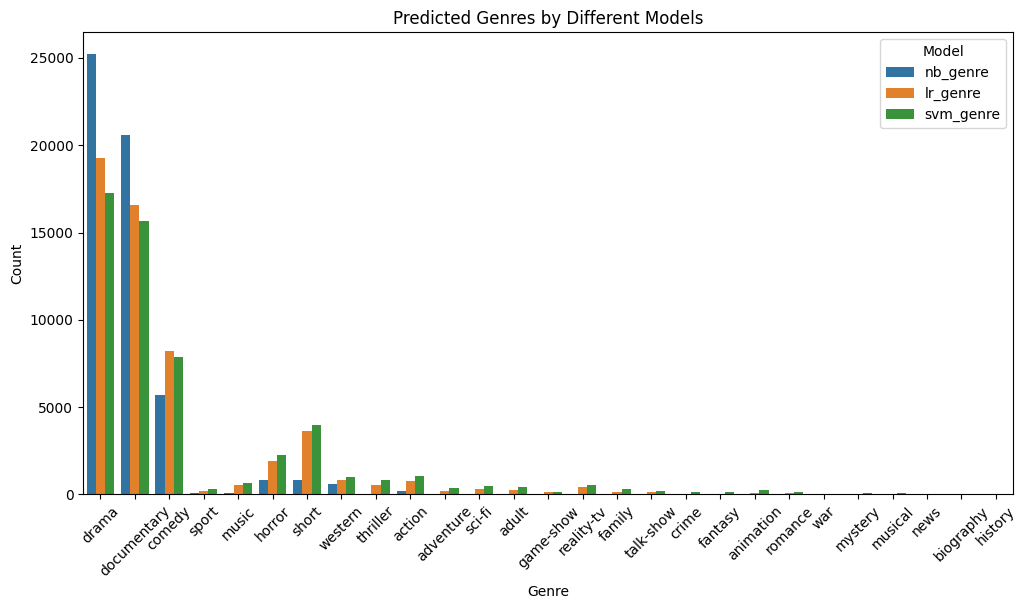

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all predictions into a single DataFrame
prediction_df = pd.DataFrame({
    'nb_genre': nb_predictions,
    'lr_genre': lr_predictions,
    'svm_genre': svm_predictions
})

# Melt the DataFrame for easier plotting
melted_df = pd.melt(prediction_df, var_name='Model', value_name='Genre')

# Plot the count of each genre for each model
plt.figure(figsize=(12, 6))
sns.countplot(data=melted_df, x='Genre', hue='Model')
plt.title('Predicted Genres by Different Models')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.show()
